It is useful to think the pixels of an image, or of a region of an image, as a network or graph. In which pixels of image are connected to its neighbors. In this situation, need to find the geodesic center of an object, the point which is closest to all other points. The points is the one with maximal closeness centrality in the network. 

https://scikit-image.org/docs/dev/auto_examples/applications/plot_pixel_graphs.html#sphx-glr-auto-examples-applications-plot-pixel-graphs-py

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology

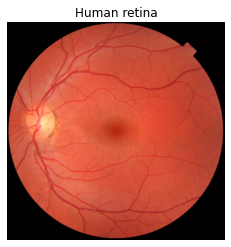

In [2]:
retina_source = data.retina()

_, ax = plt.subplots()
ax.imshow(retina_source)
ax.set_axis_off()
_ = ax.set_title('Human retina')

C:\Users\uib43225\.conda\envs\fusion\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Previously, sato implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  after removing the cwd from sys.path.


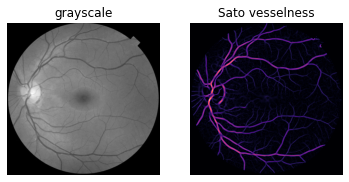

In [3]:
retina = color.rgb2gray(retina_source)
#filtering the retina with three different thresold value which helps to categories the image; in the case of no of classes 3, it will return 2 different thresold value
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
# Filter an image with the Sato tubeness filter; This filter can be used to detect continuous ridges, e.g. tubes, wrinkles, rivers. It can be used to calculate the fraction of the whole image containing such objects.
# Defined only for 2-D and 3-D images. Calculates the eigenvectors of the Hessian to compute the similarity of an image region to tubes
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

C:\Users\uib43225\.conda\envs\fusion\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


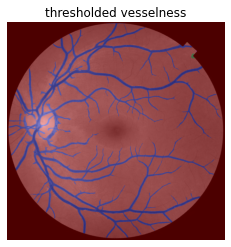

In [4]:
#Hysteresis is the lagging of an effect—a kind of inertia. In the context of thresholding, it means that areas above some low threshold are considered to be above the threshold if they are also connected to areas above a higher, more stringent, threshold. They can thus be seen as continuations of these high-confidence areas.

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)

labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('thresholded vesselness')

In [ ]:
in this example, we create such a pixel graph of a skeleton and find the central pixel of that skeleton.

In [7]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary = labeled == largest_nonzero_label
skeleton = morphology.skeletonize(binary)
g, nodes = graph.pixel_graph(skeleton, connectivity=2)
px, distances = graph.central_pixel(
        g, nodes=nodes, shape=skeleton.shape, partition_size=100
        )

centroid = measure.centroid(labeled > 0)

_, ax = plt.subplots()
ax.imshow(color.label2rgb(skeleton, retina))
ax.scatter(px[1], px[0], label='graph center')
ax.scatter(centroid[1], centroid[0], label='centroid')
ax.legend()
ax.set_axis_off()
ax.set_title('vessel graph center vs centroid')

plt.show()

AttributeError: module 'skimage.graph' has no attribute 'pixel_graph'